In [12]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Connexion à la base SQLite
db_path = "data/etf_data.db"
conn = sqlite3.connect(db_path)

In [13]:
# Nom de la table correspondant au ticker (adapté du script précédent)
table_name = "xd9u_mi"

# Voir les informations de la table dans SQLite
query = f"PRAGMA table_info({table_name})"
columns_info = pd.read_sql_query(query, conn)
print(columns_info)

   cid    name      type  notnull dflt_value  pk
0    0    Date  DATETIME        0       None   0
1    1   Close     FLOAT        0       None   0
2    2    High     FLOAT        0       None   0
3    3     Low     FLOAT        0       None   0
4    4    Open     FLOAT        0       None   0
5    5  Volume    BIGINT        0       None   0


In [16]:
# Nom de la table correspondant au ticker (adapté du script précédent)
table_name = "xd9u_mi"

# Lecture complète de la table
df = pd.read_sql(f"SELECT * FROM {table_name} ORDER BY Date DESC", conn, parse_dates=["Date"])

# Afficher les premières lignes
df.head()

,Date,Close,High,Low,Open,Volume
0,2025-04-17,135.619995,137.160004,135.210007,136.580002,8397
1,2025-04-16,137.660004,138.669998,136.289993,136.820007,9818
2,2025-04-15,140.059998,140.509995,138.919998,139.360001,12325
3,2025-04-14,138.600006,140.580002,138.899994,139.050003,11409
4,2025-04-11,135.059998,136.820007,133.229996,136.820007,36668


2406 lignes disponibles.
De 2014-09-22 à 2025-04-17


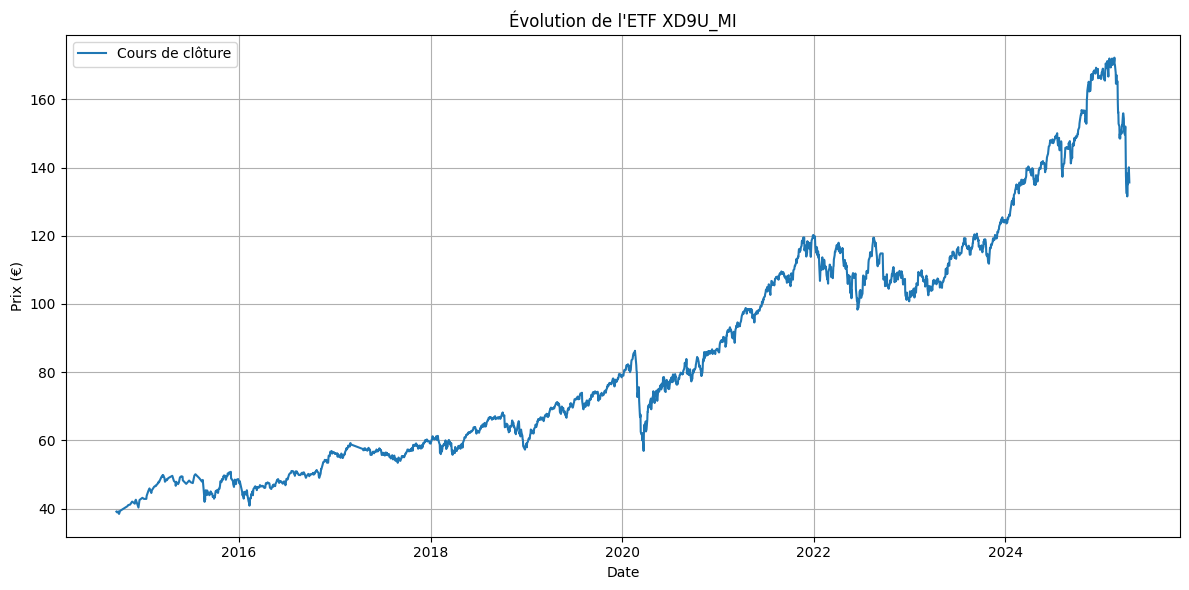

In [15]:
# Résumé rapide
print(f"{len(df)} lignes disponibles.")
print(f"De {df['Date'].min().date()} à {df['Date'].max().date()}")

# Affichage simple du cours de clôture
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Cours de clôture")
plt.title(f"Évolution de l'ETF {table_name.upper()}")
plt.xlabel("Date")
plt.ylabel("Prix (€)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import sqlite3

# --- Connexion à la base SQLite ---
conn = sqlite3.connect("data/etf_data.db")
table_name = "xd9u_mi"  # à adapter si ton ticker est différent

# --- Charger les données ---
df = pd.read_sql_query(f"SELECT Date, Close FROM {table_name}", conn)

# --- Conversion de la colonne Date ---
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# --- Dernier cours de clôture ---
latest_date = df['Date'].max()
latest_close = df.loc[df['Date'] == latest_date, 'Close'].values[0]

# --- Fonction pour trouver le cours le plus proche d'une date cible ---
def get_close_nearest(target_date):
    sub_df = df[df['Date'] <= target_date]
    if not sub_df.empty:
        return sub_df.iloc[-1]['Close']
    else:
        return None

# --- Périodes de comparaison ---
periods = {
    '1 semaine': pd.Timedelta(days=7),
    '1 mois': pd.DateOffset(months=1),
    '3 mois': pd.DateOffset(months=3),
    '6 mois': pd.DateOffset(months=6),
    '1 an': pd.DateOffset(years=1)
}

# --- Calcul des variations ---
variations = {}

for label, offset in periods.items():
    target_date = latest_date - offset
    past_close = get_close_nearest(target_date)

    if past_close is not None:
        variation = round((latest_close - past_close) / past_close * 100, 2)
        variations[label] = {
            'Cours passé': past_close,
            'Variation (%)': variation
        }
    else:
        variations[label] = {
            'Cours passé': None,
            'Variation (%)': None
        }

# --- Résumé des résultats ---
print(f"Dernier cours ({latest_date.date()}): {latest_close}")
result_df = pd.DataFrame(variations).T
print(result_df)


Dernier cours (2025-04-17): 135.6199951171875
           Cours passé  Variation (%)
1 semaine   137.039993          -1.04
1 mois      150.809998         -10.07
3 mois      170.509995         -20.46
6 mois      156.850006         -13.54
1 an        136.619995          -0.73
